### We have predefined business questions which will be trying to find out with EDA 
**NOTE:** --> This EDA is the part of my Learning and academic pupose with FunctionUp

***We already have some problem statements & Data types,source of the data which will be attaching along with this file***

This EDA mainly concern about startups and their funding in India.
There can be many other ways , technique to perform EDA with this dataset but i will stick to the given problem statement only for now.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('/Users/user/Downloads/startup_funding.csv')
df

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN
...,...,...,...,...,...,...,...,...,...,...
3039,3040,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000",NaN
3040,3041,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"8,25,000",Govt backed VC Fund
3041,3042,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000",NaN
3042,3043,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


As we can see there are lot of feature transformation required (Mismatching the data types, null values) so first i will be performing Data transformation after that will try to find out more insight. 

In [4]:
# lets handle Date column 
from datetime import datetime
def custom_date_parser(date_str):
    try:
        return datetime.strptime(date_str, '%Y-%m-%dT%H:%M:%S.%f').date()
    except ValueError:
        try:
            return datetime.strptime(date_str, '%m%Y').date()
        except ValueError:
            pass

    try:
        return pd.to_datetime(date_str, dayfirst=True, errors='coerce').date()
    except ValueError:
        return pd.NaT

# Convert the object column to a datetime column with nanoseconds precision
df['parsed_date'] = df['Date dd/mm/yyyy'].apply(custom_date_parser)

# Convert to the required format dd/mm/yyyy
df['date_column'] = df['parsed_date'].apply(lambda x: x.strftime('%d/%m/%Y') if pd.notnull(x) else '') 

In [5]:
df['Date'] =pd.to_datetime(df['date_column']) 

/Users/user/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '13/01/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/user/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '13/12/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/user/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '17/12/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/user/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '16/12/2019' in

In [6]:
df.info() # "Date" column's data type changed to datetime 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Sr No              3044 non-null   int64         
 1   Date dd/mm/yyyy    3044 non-null   object        
 2   Startup Name       3044 non-null   object        
 3   Industry Vertical  2873 non-null   object        
 4   SubVertical        2108 non-null   object        
 5   City  Location     2864 non-null   object        
 6   Investors Name     3020 non-null   object        
 7   InvestmentnType    3040 non-null   object        
 8   Amount in USD      2084 non-null   object        
 9   Remarks            419 non-null    object        
 10  parsed_date        3040 non-null   object        
 11  date_column        3044 non-null   object        
 12  Date               3040 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(11)
memory usage: 309.3+

In [7]:
# droping some columns as i dont need them for future analysis
df = df.drop(['Sr No','parsed_date','date_column','Date dd/mm/yyyy'],axis=1)
df.head()

,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks,Date
0,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN,2020-09-01
1,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN,2020-01-13
2,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN,2020-09-01
3,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN,2020-02-01
4,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN,2020-02-01


In [8]:
# now we will be handling "Amount in USD" column
amount_series = pd.Series(['15,00,000', pd.NA, '10,00,000', '5,00,00,000', '25,00,000', '45,00,000', '8,25,000', '15,00,000', pd.NA, '1,40,000'])

# Remove commas from the 'Amount in USD' values and convert to numeric type
amount_series = pd.to_numeric(amount_series.str.replace(',', ''), errors='coerce')

# Assign the converted values back to the 'Amount in USD' column in the DataFrame
df['Amount in USD'] = amount_series

df

,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks,Date
0,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1500000.0,NaN,2020-09-01
1,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,NaN,NaN,2020-01-13
2,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,1000000.0,NaN,2020-09-01
3,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,50000000.0,NaN,2020-02-01
4,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,2500000.0,NaN,2020-02-01
...,...,...,...,...,...,...,...,...,...
3039,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,NaN,NaN,2015-01-29
3040,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,NaN,Govt backed VC Fund,2015-01-29
3041,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,NaN,NaN,2015-01-30
3042,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake",2015-01-30


In the "Amount in USD" column the values were separated by "," that would give me error while changing the data types so chnaged to normal also there reasonable NaN values will be handiling next.

In [9]:
# Replace NaN values in 'Amount in USD' with 0
df['Amount in USD'].fillna(0, inplace=True)
df

,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks,Date
0,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1500000.0,NaN,2020-09-01
1,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,0.0,NaN,2020-01-13
2,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,1000000.0,NaN,2020-09-01
3,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,50000000.0,NaN,2020-02-01
4,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,2500000.0,NaN,2020-02-01
...,...,...,...,...,...,...,...,...,...
3039,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,0.0,NaN,2015-01-29
3040,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,0.0,Govt backed VC Fund,2015-01-29
3041,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,0.0,NaN,2015-01-30
3042,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,0.0,"Strategic Funding, Minority stake",2015-01-30


Since i dont have clear domain / business understanding about startup funding so i find removing the NaN value 
would be wrong so converted to 0 only and also removing those fields can give wrong analysis in later part.

In [10]:
df['Amount in USD'] = pd.to_numeric(df['Amount in USD'], errors='coerce')

In [11]:
df.info() # converted "Amount in USD" column to "float"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Startup Name       3044 non-null   object        
 1   Industry Vertical  2873 non-null   object        
 2   SubVertical        2108 non-null   object        
 3   City  Location     2864 non-null   object        
 4   Investors Name     3020 non-null   object        
 5   InvestmentnType    3040 non-null   object        
 6   Amount in USD      3044 non-null   float64       
 7   Remarks            419 non-null    object        
 8   Date               3040 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 214.2+ KB


In [17]:
import re

def clean_city_location(city_location):
  """Cleans the City Location column using regex.

  Args:
    city_location: The City Location value to be cleaned.

  Returns:
    The cleaned City Location value.
  """

  # Convert the City Location column to a string.
  city_location = str(city_location)

  # Remove any spaces before or after the city name.
  city_location = re.sub(r"\s+", "", city_location)

  # Remove any special characters from the city name.
  city_location = re.sub(r"[^a-zA-Z0-9\.]", "", city_location)

  # If the city name is New Delhi, remove the extra New's.
  if city_location == "New New New New Delhi":
    city_location = "New Delhi"

  # Remove any extra space between City and Location.
  city_location = re.sub(r"\s+City\s+Location", "City Location", city_location)

  return city_location

# Clean the City Location column.
df["City Location"] = df["City  Location"].apply(clean_city_location)

print(df["City Location"].head())

0    Bengaluru
1      Gurgaon
2    Bengaluru
3     NewDelhi
4       Mumbai
Name: City Location, dtype: object


When we have string values its a good pratice to always remove any special char , repetative inputs, extra space before performing further analysis, so i've performed some transformation.

In [ ]:
df.head()

**We have handle most of our data transformation part now lets try to perfrom some analysis**

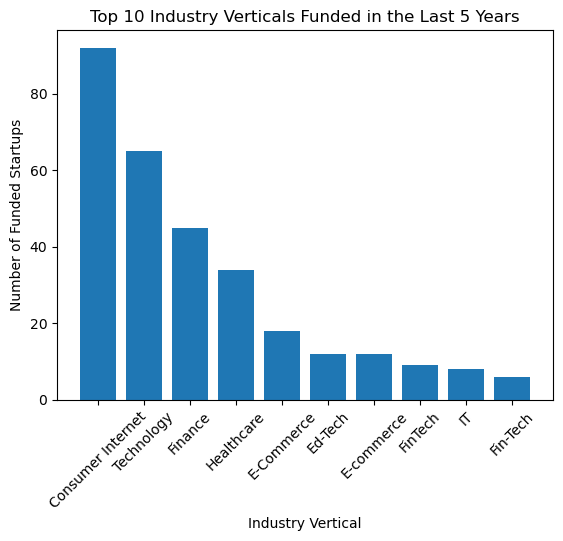

In [19]:
# Filter data for the last few years (e.g., last 5 years)
current_year = pd.to_datetime('today').year
last_few_years = current_year - 5
recent_startups = df[df['Date'].dt.year >= last_few_years]

# Count the occurrences of each industry vertical
startup_counts = recent_startups['Industry Vertical'].value_counts()

# Plot the top 10 industry verticals receiving funding
top_industries = startup_counts.head(10)
plt.bar(top_industries.index, top_industries.values)
plt.xticks(rotation=45)
plt.xlabel('Industry Vertical')
plt.ylabel('Number of Funded Startups')
plt.title(f'Top 10 Industry Verticals Funded in the Last {current_year - last_few_years} Years')
plt.show()

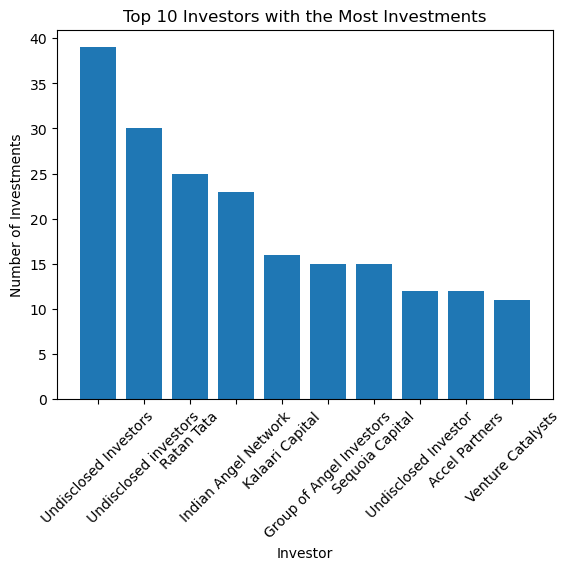

In [20]:
# Count the occurrences of each investor
investor_counts = df['Investors Name'].value_counts()

# Plot the top 10 investors who invested the most
top_investors = investor_counts.head(10)
plt.bar(top_investors.index, top_investors.values)
plt.xticks(rotation=45)
plt.xlabel('Investor')
plt.ylabel('Number of Investments')
plt.title('Top 10 Investors with the Most Investments')
plt.show()

In [21]:
# Get the list of all industry verticals
industry_verticals = df["Industry Vertical"].unique()

# Create a dictionary to store the funding amount for each industry vertical
funding_amount_by_industry_vertical = {}
for industry_vertical in industry_verticals:
    funding_amount_by_industry_vertical[industry_vertical] = 0

# Iterate over the DataFrame and update the funding amount for each industry vertical
for index, row in df.iterrows():
    industry_vertical = row["Industry Vertical"]
    funding_amount = row["Amount in USD"]
    
    # Convert the funding amount to numeric type
    funding_amount = pd.to_numeric(funding_amount, errors='coerce')
    
    # If the funding amount is not numeric (e.g., NaN), skip the entry
    if pd.notna(funding_amount):
        funding_amount_by_industry_vertical[industry_vertical] += funding_amount

# Get the top 3 industry verticals with the highest funding amount
top_3_industry_verticals = sorted(funding_amount_by_industry_vertical, key=funding_amount_by_industry_vertical.get, reverse=True)[:3]

# Print the top 3 industry verticals
print("The top 3 industry verticals with the highest funding amount are:")
for industry_vertical in top_3_industry_verticals:
    print(industry_vertical)


The top 3 industry verticals with the highest funding amount are:
FinTech
Logistics
Fashion and Apparel


Year
2015.0    933
2016.0    993
2017.0    687
2018.0    309
2019.0    111
2020.0      7
dtype: int64


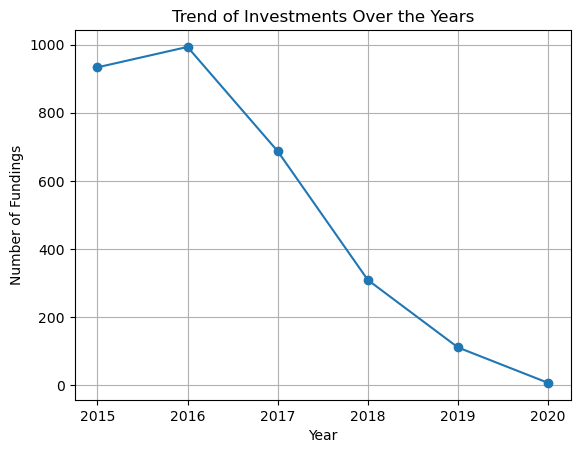

In [22]:
# Filter out invalid dates (NaT) if any
#df = df.dropna(subset=['Date'])

# Extract year from 'Date' column
df['Year'] = df['Date'].dt.year

# Group by 'Year' and count the total number of fundings for each year
yearly_fundings = df.groupby('Year').size()

# Print year-wise total number of fundings in ascending order
print(yearly_fundings.sort_index())

# Plot a line graph between year and number of fundings
plt.plot(yearly_fundings.index, yearly_fundings.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Number of Fundings')
plt.title('Trend of Investments Over the Years')
plt.xticks(yearly_fundings.index)
plt.grid(True)
plt.show()

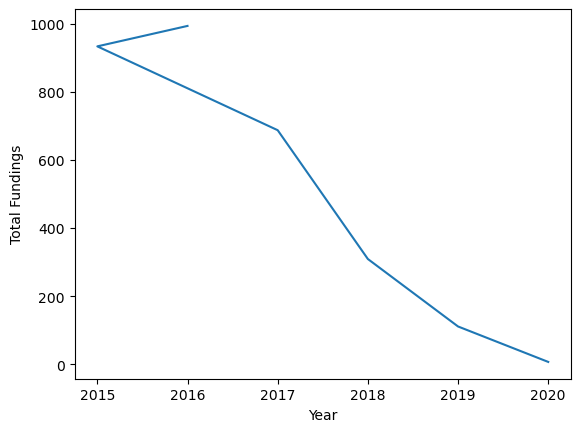

2016.0 993
2015.0 933
2017.0 687
2018.0 309
2019.0 111
2020.0 7


In [23]:
# Get the year for each funding
year = df["Date"].dt.year

# Calculate the total number of fundings for each year
total_fundings_by_year = year.value_counts()

# Plot a line graph of the total number of fundings by year
plt.plot(total_fundings_by_year.index, total_fundings_by_year.values)
plt.xlabel("Year")
plt.ylabel("Total Fundings")
plt.show()

# Print the year-wise total number of fundings
for year, total_funding in total_fundings_by_year.items():
    print(f"{year} {total_funding}")

In [24]:
city_counts = df['City  Location'].value_counts() 
print(city_counts)

Bangalore             700
Mumbai                567
New Delhi             421
Gurgaon               287
Bengaluru             141
                     ... 
Delhi & Cambridge       1
Bhubneswar              1
Srinagar                1
Rourkela                1
Dallas / Hyderabad      1
Name: City  Location, Length: 112, dtype: int64


Top 10 Indian cities with the most number of startups:
Bangalore: 700
Mumbai: 567
New Delhi: 421
Gurgaon: 287
Bengaluru: 141
Pune: 105
Hyderabad: 99
Chennai: 97
Noida: 92
Gurugram: 50


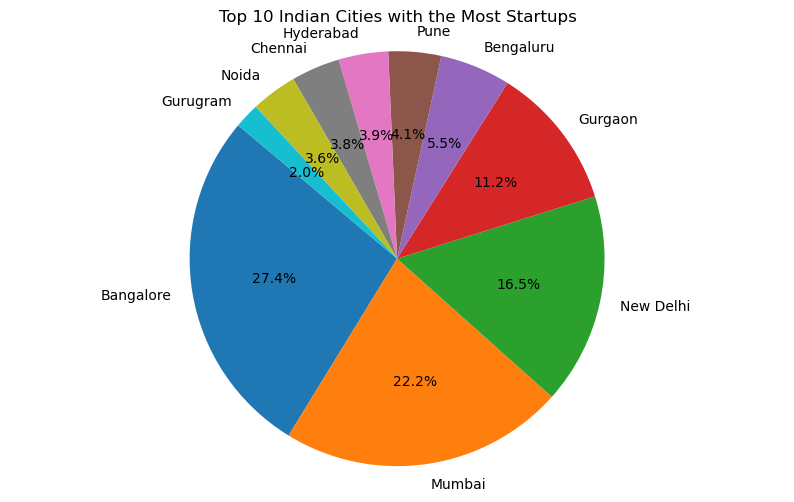

In [25]:
# Count the occurrences of each city in the DataFrame
city_counts = df['City  Location'].value_counts()

# Get the top 10 Indian cities with the most number of startups
top_10_cities = city_counts.nlargest(10)

# Print the top 10 cities and the number of startups in each city
print("Top 10 Indian cities with the most number of startups:")
for city, startups_count in top_10_cities.items():
    print(f"{city}: {startups_count}")

# Plot a pie chart to visualize the top 10 cities
plt.figure(figsize=(10, 6))
plt.pie(top_10_cities.values, labels=top_10_cities.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Top 10 Indian Cities with the Most Startups')
plt.show()

In [32]:
# Clean the City Location column.
def clean_city_location(city_location):
  """Cleans the City Location column using regex.

  Args:
    city_location: The City Location value to be cleaned.

  Returns:
    The cleaned City Location value.
  """

  # Convert the City Location column to a string.
  city_location = str(city_location)

  # Remove any spaces before or after the city name.
  city_location = re.sub(r"\s+", "", city_location)

  # Remove any special characters from the city name.
  city_location = re.sub(r"[^a-zA-Z0-9\.]", "", city_location)

  # If the city name is New Delhi, remove the extra New's.
  if city_location == "New New New New Delhi":
    city_location = "New Delhi"

  # Return the cleaned city name.
  return city_location

# Clean the City Location column.
df["City Location"] = df["City Location"].apply(clean_city_location)

# Remove the rows where the City Location is India and another country.
df = df[~df["City Location"].str.contains("India")]

# Get the top 10 cities with most amount of funding.
top_10_cities = df.groupby("City Location")["Amount in USD"].sum().sort_values(ascending=False).head(10)

# Calculate the percentage of funding each city has got.
top_10_cities = top_10_cities / df["Amount in USD"].sum() * 100

# Print the city and percentage with 2 decimal places after rounding off.
for city, percentage in top_10_cities.items():
  print(f"{city}: {round(percentage, 2)}%")

NewDelhi: 80.69%
Chennai: 7.26%
Bengaluru: 4.26%
Mumbai: 4.03%
Pune: 2.42%
Gurgaon: 1.33%
Agra: 0.0%
Noida: 0.0%
PuneSingapore: 0.0%
PuneSeattle: 0.0%


Private Equity Round: 3.75%
Series C: 0.0%
Series B: 1.61%
Pre-series A: 80.69%
Seed Round: 4.03%
Series A: 9.68%
Series D: 0.0%
Seed: 0.23%
Series F: 0.0%
Series E: 0.0%
Debt Funding: 0.0%
Series G: 0.0%
Series H: 0.0%
Venture: 0.0%
Seed Funding: 0.0%
nan: 0.0%
Funding Round: 0.0%
Corporate Round: 0.0%
Maiden Round: 0.0%
pre-series A: 0.0%
Seed Funding Round: 0.0%
Single Venture: 0.0%
Venture Round: 0.0%
Pre-Series A: 0.0%
Angel: 0.0%
Series J: 0.0%
Angel Round: 0.0%
pre-Series A: 0.0%
Venture - Series Unknown: 0.0%
Bridge Round: 0.0%
Private Equity: 0.0%
Debt and Preference capital: 0.0%
Inhouse Funding: 0.0%
Seed/ Angel Funding: 0.0%
Debt: 0.0%
Pre Series A: 0.0%
Equity: 0.0%
Debt-Funding: 0.0%
Mezzanine: 0.0%
Series B (Extension): 0.0%
Equity Based Funding: 0.0%
Private Funding: 0.0%
Seed / Angel Funding: 0.0%
Seed/Angel Funding: 0.0%
Seed funding: 0.0%
Seed / Angle Funding: 0.0%
Angel / Seed Funding: 0.0%
Private: 0.0%
Structured Debt: 0.0%
Term Loan: 0.0%
PrivateEquity: 0.0%
Ange

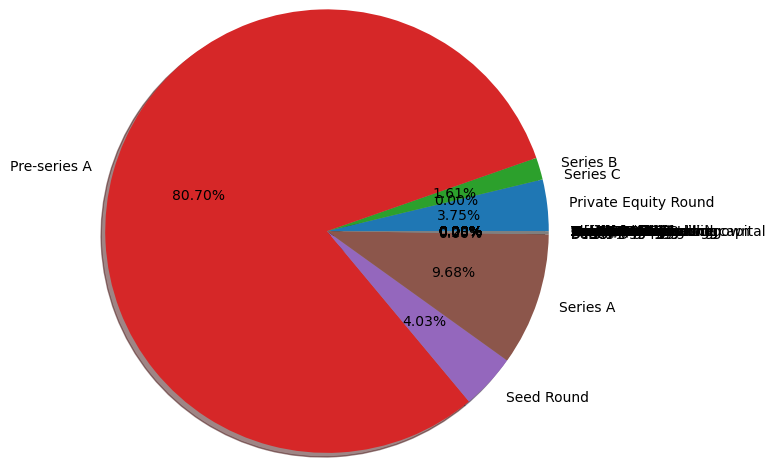

In [35]:
# Get the unique investment types.
investment_types = df["InvestmentnType"].unique()

# Calculate the percentage of amount funded for each investment type.
percentage_of_amount_funded = {}
for investment_type in investment_types:
  amount_funded = df[df["InvestmentnType"] == investment_type]["Amount in USD"].sum()
  percentage = amount_funded / df["Amount in USD"].sum() * 100
  percentage_of_amount_funded[investment_type] = round(percentage, 2)

# Print the investment type and percentage of amount funded with 2 decimal places after rounding off.
for investment_type, percentage in percentage_of_amount_funded.items():
  print(f"{investment_type}: {percentage}%")

# Create a pie chart to visualize the percentage of amount funded for each investment type.
plt.pie(percentage_of_amount_funded.values(), labels=percentage_of_amount_funded.keys(), autopct="%.2f%%", \
        shadow=True, startangle=0, radius=1.5)
plt.show()

In [37]:
# Correct the spelling of "Ecommerce".
df["Industry Vertical"] = df["Industry Vertical"].replace("Ecommerse", "Ecommerce")

# Get the unique industry verticals.
industry_verticals = df["Industry Vertical"].unique()

# Calculate the percentage of amount funded for each industry vertical.
percentage_of_amount_funded = {}
for industry_vertical in industry_verticals:
  amount_funded = df[df["Industry Vertical"] == industry_vertical]["Amount in USD"].sum()
  percentage = amount_funded / df["Amount in USD"].sum() * 100
  percentage_of_amount_funded[industry_vertical] = round(percentage, 2)

# Get the top 5 industries.
top_5_industries = sorted(percentage_of_amount_funded.items(), key=lambda x: x[1], reverse=True)[:5]

# Print the industry and percentage of the amount funded with 2 decimal places after rounding off.
for industry, percentage in top_5_industries:
  print(f"{industry}: {percentage}%")

/var/folders/pz/5cx5_pn93f5f1v5fwnvpk56m0000gn/T/ipykernel_43798/2852551660.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Industry Vertical"] = df["Industry Vertical"].replace("Ecommerse", "Ecommerce")


FinTech: 80.69%
Logistics: 7.26%
Fashion and Apparel: 4.03%
E-Tech: 2.42%
Technology: 2.42%


In [41]:
# Correct the names of important startups.
df["Startup Name"] = df["Startup Name"].replace("Ola Cabs", "Ola")
df["Startup Name"] = df["Startup Name"].replace("Flipkart.com", "Flipkart")
df["Startup Name"] = df["Startup Name"].replace("Oyo Rooms", "Oyo")
df["Startup Name"] = df["Startup Name"].replace("Paytm Marketplace", "Paytm")

# Get the top 5 startups with most amount of total funding.
top_5_startups = df.sort_values("Amount in USD", ascending=False).head(5)

# Print the startup name in descending order with respect to amount of funding.
for startup in top_5_startups["Startup Name"]:
  print(startup)

https://www.wealthbucket.in/
Pando
Fashor
BYJU’S
Ecozen


/var/folders/pz/5cx5_pn93f5f1v5fwnvpk56m0000gn/T/ipykernel_43798/2096258558.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Startup Name"] = df["Startup Name"].replace("Ola Cabs", "Ola")
/var/folders/pz/5cx5_pn93f5f1v5fwnvpk56m0000gn/T/ipykernel_43798/2096258558.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Startup Name"] = df["Startup Name"].replace("Flipkart.com", "Flipkart")
/var/folders/pz/5cx5_pn93f5f1v5fwnvpk56m0000gn/T/ipykernel_43798/2096258558.py:4: SettingWithCopyWarning: 
A valu

In [45]:
# Group_by_startup name and count the number of funding rounds for each startup
startup_round_counts = df.groupby('Startup Name').size().reset_index(name='FundingRounds')

# Sort the startups based on the number of funding rounds in descending order
top_5_startups = startup_round_counts.nlargest(5, 'FundingRounds')

# Print the top 5 startups with the most number of funding rounds
print("Top 5 Startups with Most Funding Rounds:")
print(top_5_startups)

Top 5 Startups with Most Funding Rounds:
     Startup Name  FundingRounds
1447          Ola             12
1505        Paytm              8
1943       Swiggy              8
685      Flipkart              6
1262      Medinfi              6
